.

#                                CROP RECOMMENDATION MODEL

.

In [ ]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# df variable holding of only 8 crops data
# df1 variable holding of whole data with all the crops
# df2 variable holding the data after removing these columns 'crop_names','Unnamed: 0','state_names' from the df variable
# df3 variable holding the data after one hot encoding which was done, by passing df2 variable to the get dummies method.

In [4]:
df1=pd.read_csv("Crop_Recom_finalised_dataset.csv")
df1

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,20.770894,2.068260,1014.863796,21.947147,loamy,56.070,0.000,0.000,1113.0,1113.000000
1,125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,20.160426,1.976480,1015.193528,20.643237,sandy,9.000,9.000,0.000,6300.0,0.357955
2,125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,21.998299,2.000524,1014.184607,21.422312,clay,0.000,0.000,0.000,152800.0,0.557461
3,125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,21.776377,2.019750,1015.053118,21.810567,chalky,38.250,38.250,38.250,18600.0,0.455882
4,125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,20.075734,1.974351,1015.170238,21.930206,clay,0.000,23.184,0.000,1100.0,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000.0,21.635879,2.000060,1014.302213,20.060662,silty,7.840,7.840,0.000,3300.0,0.825000
12624,137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300.0,21.709611,2.053609,1015.803912,21.263478,silt,7.504,18.760,7.504,200.0,0.153846
12625,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100.0,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0,0.920962
12626,137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400.0,21.569380,2.004421,1013.989125,21.835158,chalky,2.896,3.620,0.000,11500.0,1.223404


In [88]:
# Due to Imbalance of Label column we are Considering only the best 8 closest crops
df =pd.read_csv("updated_8crop_datset.csv")
df

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,125274,Maharashtra,AHMEDNAGAR,2000,Kharif,Arhar/Tur,19100,21.398449,2.031969,1015.872489,21.264996,peaty,38.250,38.250,38.250,9400.0,0.492147
1,125277,Maharashtra,AHMEDNAGAR,2000,Kharif,Cotton(lint),15700,20.736520,2.001322,1013.193224,20.352649,sandy,36.840,98.240,49.120,25600.0,1.630573
2,125281,Maharashtra,AHMEDNAGAR,2000,Kharif,Moong(Green Gram),19400,21.174489,2.081393,1013.195565,21.790453,clay,0.000,0.000,0.000,8400.0,0.432990
3,125288,Maharashtra,AHMEDNAGAR,2000,Kharif,Soyabean,7200,21.753878,2.101004,1013.258102,21.963404,sandy,16.820,16.820,0.000,6200.0,0.861111
4,125290,Maharashtra,AHMEDNAGAR,2000,Kharif,Urad,3400,21.594982,2.090342,1015.602757,20.733717,peaty,0.000,0.000,0.000,1800.0,0.529412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,137811,Maharashtra,YAVATMAL,2014,Kharif,Moong(Green Gram),8300,21.920299,1.979141,1015.140602,20.224895,silty,0.000,26.832,0.000,1300.0,0.156627
3541,137812,Maharashtra,YAVATMAL,2014,Kharif,Soyabean,306000,21.455614,2.036909,1014.291696,21.981796,silty,10.240,26.624,26.624,97600.0,0.318954
3542,137813,Maharashtra,YAVATMAL,2014,Rabi,Gram,38500,21.755582,2.014701,1015.121154,20.091311,sandy,41.496,110.656,55.328,32600.0,0.846753
3543,137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0,0.920962


In [24]:
df2

,district_names,crop_year,season_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,AHMEDNAGAR,2000,Kharif,19100,21.398449,2.031969,1015.872489,21.264996,peaty,38.250,38.250,38.250,9400.0,0.492147
1,AHMEDNAGAR,2000,Kharif,15700,20.736520,2.001322,1013.193224,20.352649,sandy,36.840,98.240,49.120,25600.0,1.630573
2,AHMEDNAGAR,2000,Kharif,19400,21.174489,2.081393,1013.195565,21.790453,clay,0.000,0.000,0.000,8400.0,0.432990
3,AHMEDNAGAR,2000,Kharif,7200,21.753878,2.101004,1013.258102,21.963404,sandy,16.820,16.820,0.000,6200.0,0.861111
4,AHMEDNAGAR,2000,Kharif,3400,21.594982,2.090342,1015.602757,20.733717,peaty,0.000,0.000,0.000,1800.0,0.529412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,YAVATMAL,2014,Kharif,8300,21.920299,1.979141,1015.140602,20.224895,silty,0.000,26.832,0.000,1300.0,0.156627
3541,YAVATMAL,2014,Kharif,306000,21.455614,2.036909,1014.291696,21.981796,silty,10.240,26.624,26.624,97600.0,0.318954
3542,YAVATMAL,2014,Rabi,38500,21.755582,2.014701,1015.121154,20.091311,sandy,41.496,110.656,55.328,32600.0,0.846753
3543,YAVATMAL,2014,Rabi,29100,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0,0.920962


# EDA

In [15]:
# Check the file path before running the cell
df1['crop_names'].value_counts()

Maize                      1056
Sunflower                   960
Jowar                       875
Groundnut                   869
Sesamum                     673
Rice                        654
Moong(Green Gram)           573
Arhar/Tur                   570
Urad                        550
Gram                        548
Wheat                       518
Soyabean                    477
Cotton(lint)                465
Sugarcane                   456
Bajra                       386
Rapeseed &Mustard           367
Other Kharif pulses         342
Safflower                   339
Niger seed                  323
Other  Rabi pulses          306
Castor seed                 296
Linseed                     281
Small millets               210
Ragi                        206
Other Cereals & Millets      86
other oilseeds               43
Mango                        31
Tomato                       30
Pulses total                 29
Total foodgrain              29
Banana                       28
Onion   

<AxesSubplot:xlabel='crop_year', ylabel='Yield'>

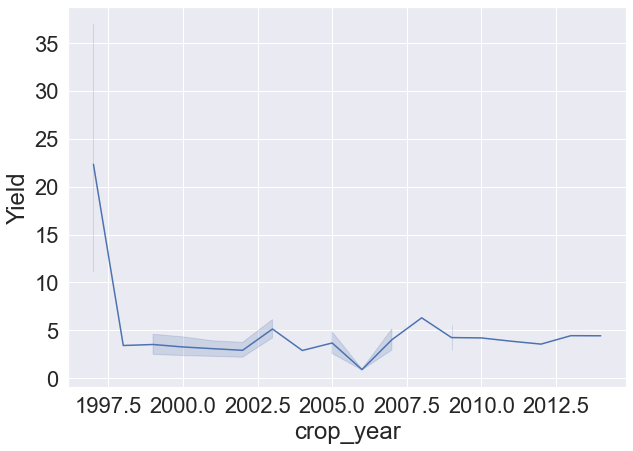

In [16]:
#lineplot for Yield and the crop year on whole dataset

plt.figure(figsize=(10,7))
sns.set(font_scale=2)
sns.lineplot(x=df1["crop_year"], y=df1["Yield"])


In [209]:
# Distribution of data in Boxplot

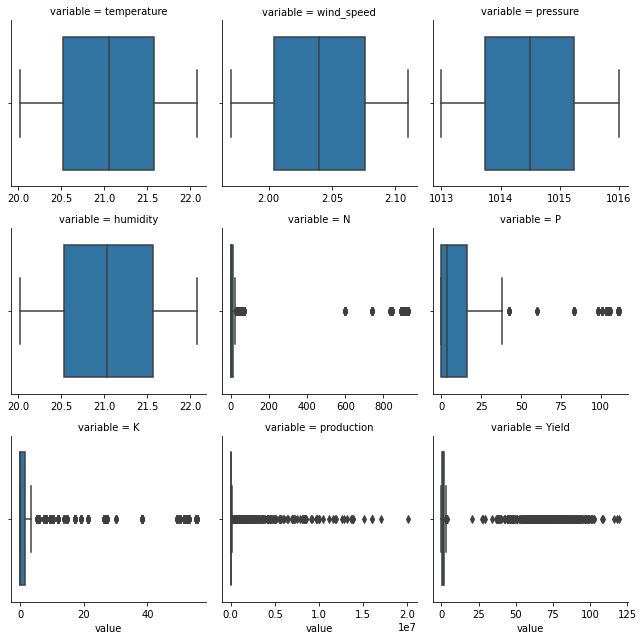

In [25]:
unpivot = pd.melt(df2, df2.describe().columns[1], df2.describe().columns[2:])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

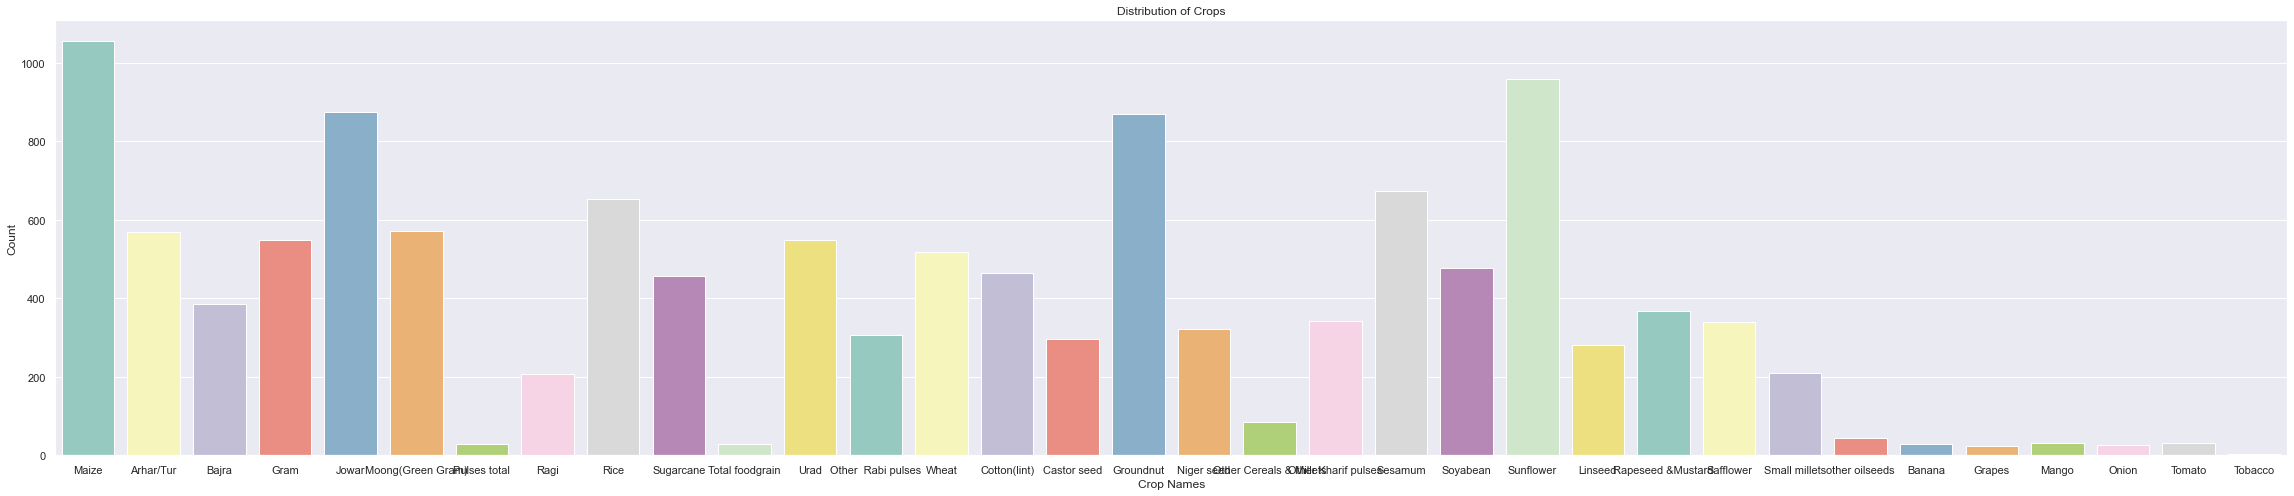

In [18]:
#Countplot for Crop_names 

import seaborn as sns
sns.set(style="darkgrid")
# Create a figure object
fig, ax = plt.subplots(figsize=(40,8))
sns.countplot(x=df1['crop_names'], data=df1, palette='Set3')
plt.title('Distribution of Crops')
plt.xlabel('Crop Names')
plt.ylabel('Count')
plt.show()
#plt.grid()


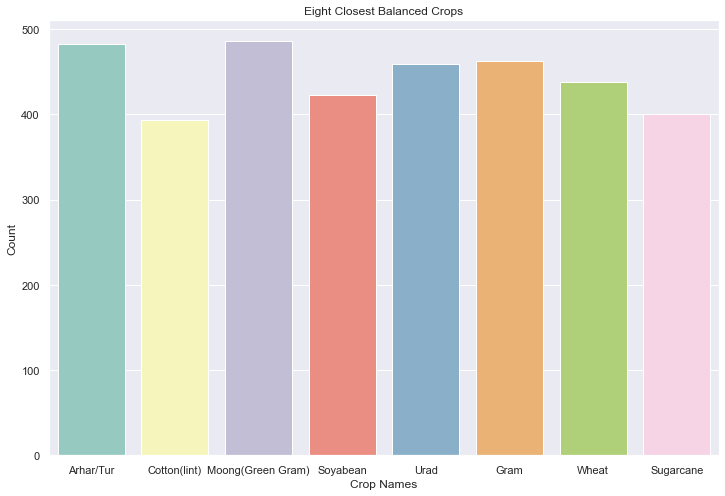

In [28]:
# We have choosen the closest count of 8 crop names
import seaborn as sns
sns.set(style="darkgrid")
# Create a figure object
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x=df['crop_names'], data=df, palette='Set3') # df variable consisting of only 8 crops data
plt.title('Eight Closest Balanced Crops')
plt.xlabel('Crop Names')
plt.ylabel('Count')
plt.show()



### Due to Imbalance of Label column we are Considering only the best 8 closest crops
#df =pd.read_csv("updated_8crop_datset.csv")
#df

# Data Pre-Processing

In [89]:
df.isnull().sum()

Unnamed: 0         0
state_names        0
district_names     0
crop_year          0
season_names       0
crop_names         0
area               0
temperature        0
wind_speed         0
pressure           0
humidity           0
soil_type          0
N                  0
P                  0
K                  0
production        11
Yield             11
dtype: int64

In [90]:
# don't Run This Cell Un-Necessarily 


df[df['production'].isnull()]

,Unnamed: 0,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
689,127616,Maharashtra,BHANDARA,2014,Kharif,Moong(Green Gram),100,20.795404,1.995650,1015.304537,21.531000,silt,6.440,6.440,0.000,NaN,NaN
1114,129020,Maharashtra,GADCHIROLI,2011,Kharif,Urad,100,20.141203,2.002744,1013.972074,20.754099,clay,1.500,0.000,0.000,NaN,NaN
1213,129288,Maharashtra,GONDIA,2013,Kharif,Urad,100,21.604356,1.984858,1015.934152,20.996160,silty,2.422,6.055,2.422,NaN,NaN
1644,130787,Maharashtra,KOLHAPUR,2008,Kharif,Moong(Green Gram),2000,21.760259,2.052091,1014.299589,20.034440,clay,4.531,4.531,0.000,NaN,NaN
2407,133545,Maharashtra,PALGHAR,2014,Kharif,Moong(Green Gram),100,21.069644,2.059428,1013.479699,21.587046,clay,0.825,0.825,0.825,NaN,NaN
2695,134743,Maharashtra,RAIGAD,2014,Kharif,Moong(Green Gram),100,21.757303,2.078189,1013.338651,21.004682,chalky,7.656,20.416,10.208,NaN,NaN
2737,134958,Maharashtra,RATNAGIRI,2014,Kharif,Moong(Green Gram),100,21.628118,2.087778,1014.631158,20.939191,silty,6.390,16.330,0.000,NaN,NaN
3002,136090,Maharashtra,SINDHUDURG,2014,Kharif,Arhar/Tur,100,21.371608,2.005243,1015.913392,20.539356,clay,8.600,8.600,0.000,NaN,NaN
3003,136092,Maharashtra,SINDHUDURG,2014,Kharif,Moong(Green Gram),100,22.047323,1.976951,1013.608109,20.951425,silt,38.250,38.250,38.250,NaN,NaN
3191,136818,Maharashtra,THANE,2014,Kharif,Moong(Green Gram),100,20.212683,2.025195,1014.350347,21.973430,loamy,0.000,0.000,0.000,NaN,NaN


In [91]:
# Removing Null values from Yield and Production , where null values for both Production and Yield Where showing the Same Records

df.drop([689,1114,1213,1644,2407,2695,2737,3002,3003,3191,3306], inplace=True)

In [65]:
# df2 variable holding the data after removing these columns 'crop_names','Unnamed: 0','state_names' from the df variable

df2 =df.drop(['crop_names','Unnamed: 0','state_names'],axis=1)
df2

,district_names,crop_year,season_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,AHMEDNAGAR,2000,Kharif,19100,21.398449,2.031969,1015.872489,21.264996,peaty,38.250,38.250,38.250,9400.0,0.492147
1,AHMEDNAGAR,2000,Kharif,15700,20.736520,2.001322,1013.193224,20.352649,sandy,36.840,98.240,49.120,25600.0,1.630573
2,AHMEDNAGAR,2000,Kharif,19400,21.174489,2.081393,1013.195565,21.790453,clay,0.000,0.000,0.000,8400.0,0.432990
3,AHMEDNAGAR,2000,Kharif,7200,21.753878,2.101004,1013.258102,21.963404,sandy,16.820,16.820,0.000,6200.0,0.861111
4,AHMEDNAGAR,2000,Kharif,3400,21.594982,2.090342,1015.602757,20.733717,peaty,0.000,0.000,0.000,1800.0,0.529412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,YAVATMAL,2014,Kharif,8300,21.920299,1.979141,1015.140602,20.224895,silty,0.000,26.832,0.000,1300.0,0.156627
3541,YAVATMAL,2014,Kharif,306000,21.455614,2.036909,1014.291696,21.981796,silty,10.240,26.624,26.624,97600.0,0.318954
3542,YAVATMAL,2014,Rabi,38500,21.755582,2.014701,1015.121154,20.091311,sandy,41.496,110.656,55.328,32600.0,0.846753
3543,YAVATMAL,2014,Rabi,29100,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0,0.920962


In [31]:
df2

,district_names,crop_year,season_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,AHMEDNAGAR,2000,Kharif,19100,21.398449,2.031969,1015.872489,21.264996,peaty,38.250,38.250,38.250,9400.0,0.492147
1,AHMEDNAGAR,2000,Kharif,15700,20.736520,2.001322,1013.193224,20.352649,sandy,36.840,98.240,49.120,25600.0,1.630573
2,AHMEDNAGAR,2000,Kharif,19400,21.174489,2.081393,1013.195565,21.790453,clay,0.000,0.000,0.000,8400.0,0.432990
3,AHMEDNAGAR,2000,Kharif,7200,21.753878,2.101004,1013.258102,21.963404,sandy,16.820,16.820,0.000,6200.0,0.861111
4,AHMEDNAGAR,2000,Kharif,3400,21.594982,2.090342,1015.602757,20.733717,peaty,0.000,0.000,0.000,1800.0,0.529412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,YAVATMAL,2014,Kharif,8300,21.920299,1.979141,1015.140602,20.224895,silty,0.000,26.832,0.000,1300.0,0.156627
3541,YAVATMAL,2014,Kharif,306000,21.455614,2.036909,1014.291696,21.981796,silty,10.240,26.624,26.624,97600.0,0.318954
3542,YAVATMAL,2014,Rabi,38500,21.755582,2.014701,1015.121154,20.091311,sandy,41.496,110.656,55.328,32600.0,0.846753
3543,YAVATMAL,2014,Rabi,29100,21.851730,2.027476,1014.031903,20.059945,sandy,0.000,0.000,0.000,26800.0,0.920962


In [32]:
df2.describe()

,crop_year,area,temperature,wind_speed,pressure,humidity,N,P,K,production,Yield
count,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3.534000e+03,3534.000000
mean,2006.895020,42385.938879,21.044210,2.040314,1014.495338,21.043013,67.255151,12.914483,6.155027,2.791903e+05,8.783765
std,4.276068,68005.826115,0.600309,0.040723,0.863603,0.596845,213.460948,23.641014,14.086154,1.304137e+06,22.691577
min,2000.000000,1.000000,20.020246,1.970018,1013.000384,20.020101,0.000000,0.000000,0.000000,1.000000e+00,0.035714
25%,2003.000000,3200.000000,20.515911,2.004675,1013.737516,20.532530,0.825000,0.000000,0.000000,2.700000e+03,0.534536
50%,2007.000000,18700.000000,21.050612,2.040118,1014.504841,21.033828,4.000000,3.500000,0.000000,1.805000e+04,0.834119
75%,2011.000000,51100.000000,21.576696,2.075989,1015.239707,21.565025,10.580000,15.712000,1.501000,6.570000e+04,1.494855
max,2014.000000,558800.000000,22.079186,2.109983,1015.999477,22.079981,928.372000,111.200000,55.600000,2.004970e+07,119.276358


# Feature Engineering on Required Columns

In [66]:
# Performing Label Encoding for the season names
from sklearn.preprocessing import LabelEncoder
cat_vars = ['season_names']
for col in cat_vars:
  le=LabelEncoder()
  df2[col]=le.fit_transform(df2[col])
df2.head()


,district_names,crop_year,season_names,area,temperature,wind_speed,pressure,humidity,soil_type,N,P,K,production,Yield
0,AHMEDNAGAR,2000,0,19100,21.398449,2.031969,1015.872489,21.264996,peaty,38.25,38.25,38.25,9400.0,0.492147
1,AHMEDNAGAR,2000,0,15700,20.736520,2.001322,1013.193224,20.352649,sandy,36.84,98.24,49.12,25600.0,1.630573
2,AHMEDNAGAR,2000,0,19400,21.174489,2.081393,1013.195565,21.790453,clay,0.00,0.00,0.00,8400.0,0.432990
3,AHMEDNAGAR,2000,0,7200,21.753878,2.101004,1013.258102,21.963404,sandy,16.82,16.82,0.00,6200.0,0.861111
4,AHMEDNAGAR,2000,0,3400,21.594982,2.090342,1015.602757,20.733717,peaty,0.00,0.00,0.00,1800.0,0.529412


In [67]:
df2['season_names'].value_counts()

0    2282
1     930
2     322
Name: season_names, dtype: int64

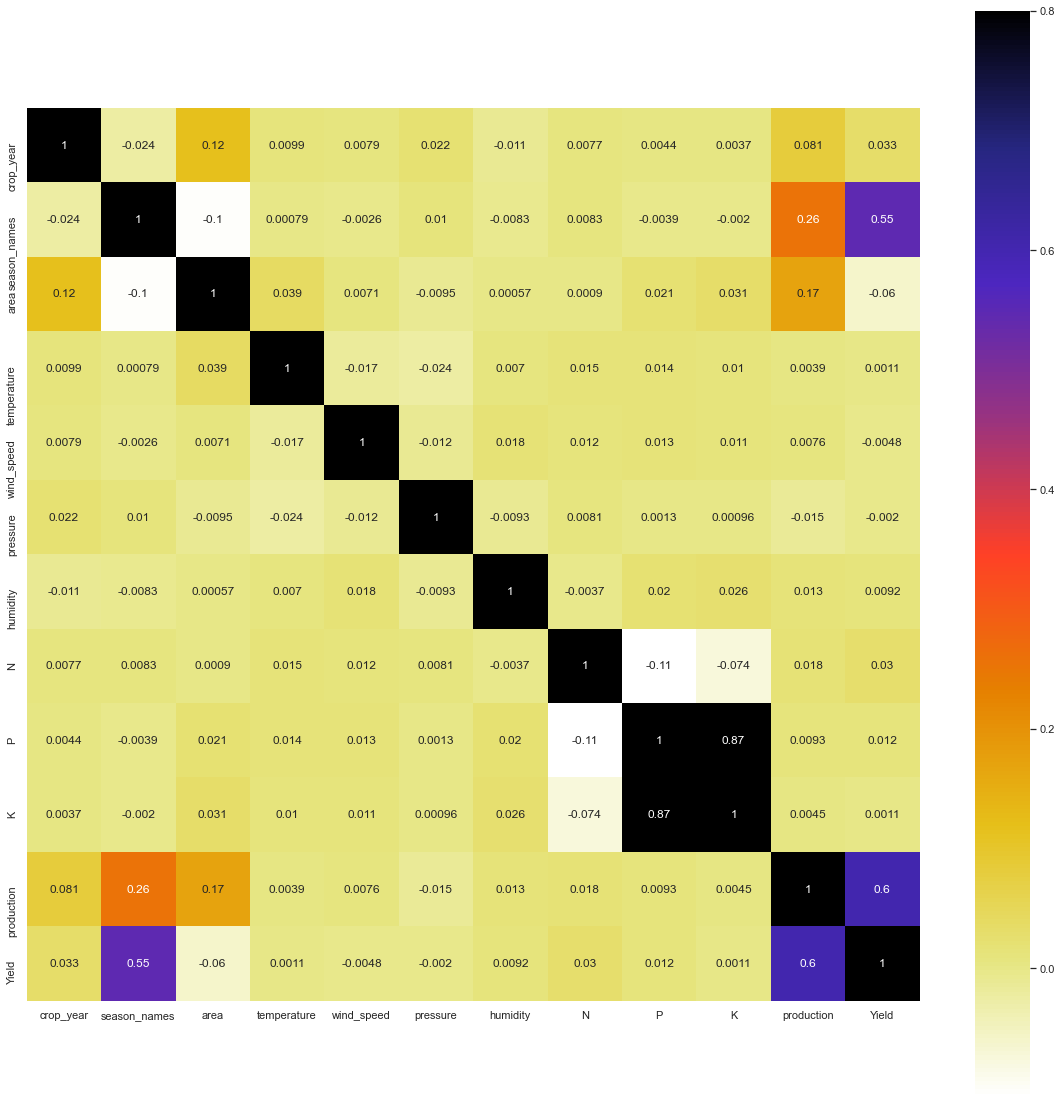

In [68]:
import matplotlib.pyplot as plt
import seaborn as sb

C_mat = df2.corr()
fig = plt.figure(figsize = (20,20))

sb.heatmap(C_mat, vmax = .8, square = True,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# df2 variable holding the data after removing these columns 'crop_names','Unnamed: 0','state_names' from the df variable
'''
df2 =df.drop(['crop_names','Unnamed: 0','state_names'],axis=1)
df2
'''

In [69]:
import pandas as pd
# creating a copy of the original data frame
df_dummies = df2.copy()

# calling the get_dummies method
# the first parameter mentions the name of the data frame to store the new data frame
# the second parameter is the list of columns which if not mentioned returns the dummies for all categorical columns
df3 = pd.get_dummies(df_dummies)#,columns = ['crop_names','soil_type'])

display(df3)


#df3 variable holding the data after one hot encoding which was done, by passing df2 variable to the get dummies method.


,crop_year,season_names,area,temperature,wind_speed,pressure,humidity,N,P,K,...,district_names_WARDHA,district_names_WASHIM,district_names_YAVATMAL,soil_type_chalky,soil_type_clay,soil_type_loamy,soil_type_peaty,soil_type_sandy,soil_type_silt,soil_type_silty
0,2000,0,19100,21.398449,2.031969,1015.872489,21.264996,38.250,38.250,38.250,...,0,0,0,0,0,0,1,0,0,0
1,2000,0,15700,20.736520,2.001322,1013.193224,20.352649,36.840,98.240,49.120,...,0,0,0,0,0,0,0,1,0,0
2,2000,0,19400,21.174489,2.081393,1013.195565,21.790453,0.000,0.000,0.000,...,0,0,0,0,1,0,0,0,0,0
3,2000,0,7200,21.753878,2.101004,1013.258102,21.963404,16.820,16.820,0.000,...,0,0,0,0,0,0,0,1,0,0
4,2000,0,3400,21.594982,2.090342,1015.602757,20.733717,0.000,0.000,0.000,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,2014,0,8300,21.920299,1.979141,1015.140602,20.224895,0.000,26.832,0.000,...,0,0,1,0,0,0,0,0,0,1
3541,2014,0,306000,21.455614,2.036909,1014.291696,21.981796,10.240,26.624,26.624,...,0,0,1,0,0,0,0,0,0,1
3542,2014,1,38500,21.755582,2.014701,1015.121154,20.091311,41.496,110.656,55.328,...,0,0,1,0,0,0,0,1,0,0
3543,2014,1,29100,21.851730,2.027476,1014.031903,20.059945,0.000,0.000,0.000,...,0,0,1,0,0,0,0,1,0,0


In [70]:
df3.columns

Index(['crop_year', 'season_names', 'area', 'temperature', 'wind_speed',
       'pressure', 'humidity', 'N', 'P', 'K', 'production', 'Yield',
       'district_names_AHMEDNAGAR', 'district_names_AKOLA',
       'district_names_AMRAVATI', 'district_names_AURANGABAD',
       'district_names_BEED', 'district_names_BHANDARA',
       'district_names_BULDHANA', 'district_names_CHANDRAPUR',
       'district_names_DHULE', 'district_names_GADCHIROLI',
       'district_names_GONDIA', 'district_names_HINGOLI',
       'district_names_JALGAON', 'district_names_JALNA',
       'district_names_KOLHAPUR', 'district_names_LATUR',
       'district_names_NAGPUR', 'district_names_NANDED',
       'district_names_NANDURBAR', 'district_names_NASHIK',
       'district_names_OSMANABAD', 'district_names_PALGHAR',
       'district_names_PARBHANI', 'district_names_PUNE',
       'district_names_RAIGAD', 'district_names_RATNAGIRI',
       'district_names_SANGLI', 'district_names_SATARA',
       'district_names_SINDHUD

In [71]:
df3.shape

(3534, 53)

In [72]:
df3.describe()

,crop_year,season_names,area,temperature,wind_speed,pressure,humidity,N,P,K,...,district_names_WARDHA,district_names_WASHIM,district_names_YAVATMAL,soil_type_chalky,soil_type_clay,soil_type_loamy,soil_type_peaty,soil_type_sandy,soil_type_silt,soil_type_silty
count,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,...,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000,3534.000000
mean,2006.895020,0.445388,42385.938879,21.044210,2.040314,1014.495338,21.043013,67.255151,12.914483,6.155027,...,0.033107,0.032824,0.033390,0.145727,0.154216,0.140068,0.140068,0.142049,0.134692,0.143181
std,4.276068,0.655262,68005.826115,0.600309,0.040723,0.863603,0.596845,213.460948,23.641014,14.086154,...,0.178941,0.178201,0.179678,0.352882,0.361207,0.347107,0.347107,0.349149,0.341442,0.350306
min,2000.000000,0.000000,1.000000,20.020246,1.970018,1013.000384,20.020101,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,3200.000000,20.515911,2.004675,1013.737516,20.532530,0.825000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.000000,18700.000000,21.050612,2.040118,1014.504841,21.033828,4.000000,3.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,1.000000,51100.000000,21.576696,2.075989,1015.239707,21.565025,10.580000,15.712000,1.501000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2014.000000,2.000000,558800.000000,22.079186,2.109983,1015.999477,22.079981,928.372000,111.200000,55.600000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
df.shape

(3534, 17)

In [73]:
#Perforing Label Encoding on Crop names for label attribute

In [93]:
from sklearn.preprocessing import LabelEncoder
y = df.loc[:,'crop_names']
labelEncoder_y =LabelEncoder()
labelEncoder_y.fit(y)
integer_mapping ={l: i for i,l in enumerate(labelEncoder_y.classes_)}
y =labelEncoder_y.transform(y)

In [94]:
y

array([0, 1, 3, ..., 2, 7, 5])

In [45]:
from sklearn.preprocessing import LabelEncoder

# create a label encoder object
#le = LabelEncoder()

# fit and transform the data
#data = ['apple', 'banana', 'cherry']
#encoded_data = le.fit_transform(data)

# get the original values
original_data = labelEncoder_y.inverse_transform(y)

print(original_data)


['Arhar/Tur' 'Cotton(lint)' 'Moong(Green Gram)' ... 'Gram' 'Wheat'
 'Sugarcane']


In [46]:
integer_mapping

{'Arhar/Tur': 0,
 'Cotton(lint)': 1,
 'Gram': 2,
 'Moong(Green Gram)': 3,
 'Soyabean': 4,
 'Sugarcane': 5,
 'Urad': 6,
 'Wheat': 7}

In [95]:
# Spliting the X and Y for Train-Test Split
X_features=df3
Y_target =y # Before running this cell,once again run the df variable and makesure to remove null values of crop_names(label)column


In [81]:
X_features

,crop_year,season_names,area,temperature,wind_speed,pressure,humidity,N,P,K,...,district_names_WARDHA,district_names_WASHIM,district_names_YAVATMAL,soil_type_chalky,soil_type_clay,soil_type_loamy,soil_type_peaty,soil_type_sandy,soil_type_silt,soil_type_silty
0,2000,0,19100,21.398449,2.031969,1015.872489,21.264996,38.250,38.250,38.250,...,0,0,0,0,0,0,1,0,0,0
1,2000,0,15700,20.736520,2.001322,1013.193224,20.352649,36.840,98.240,49.120,...,0,0,0,0,0,0,0,1,0,0
2,2000,0,19400,21.174489,2.081393,1013.195565,21.790453,0.000,0.000,0.000,...,0,0,0,0,1,0,0,0,0,0
3,2000,0,7200,21.753878,2.101004,1013.258102,21.963404,16.820,16.820,0.000,...,0,0,0,0,0,0,0,1,0,0
4,2000,0,3400,21.594982,2.090342,1015.602757,20.733717,0.000,0.000,0.000,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,2014,0,8300,21.920299,1.979141,1015.140602,20.224895,0.000,26.832,0.000,...,0,0,1,0,0,0,0,0,0,1
3541,2014,0,306000,21.455614,2.036909,1014.291696,21.981796,10.240,26.624,26.624,...,0,0,1,0,0,0,0,0,0,1
3542,2014,1,38500,21.755582,2.014701,1015.121154,20.091311,41.496,110.656,55.328,...,0,0,1,0,0,0,0,1,0,0
3543,2014,1,29100,21.851730,2.027476,1014.031903,20.059945,0.000,0.000,0.000,...,0,0,1,0,0,0,0,1,0,0


In [82]:
Y_target

array([0, 1, 3, ..., 2, 7, 5])

In [83]:
X_features.shape

(3534, 53)

In [96]:
Y_target.shape

(3534,)

In [52]:
# Checking whether null values where removed properly or not before training model
for i in X_features:
    print(i,X_features[i].isnull().sum())

crop_year 0
season_names 0
area 0
temperature 0
wind_speed 0
pressure 0
humidity 0
N 0
P 0
K 0
production 0
Yield 0
district_names_AHMEDNAGAR 0
district_names_AKOLA 0
district_names_AMRAVATI 0
district_names_AURANGABAD 0
district_names_BEED 0
district_names_BHANDARA 0
district_names_BULDHANA 0
district_names_CHANDRAPUR 0
district_names_DHULE 0
district_names_GADCHIROLI 0
district_names_GONDIA 0
district_names_HINGOLI 0
district_names_JALGAON 0
district_names_JALNA 0
district_names_KOLHAPUR 0
district_names_LATUR 0
district_names_NAGPUR 0
district_names_NANDED 0
district_names_NANDURBAR 0
district_names_NASHIK 0
district_names_OSMANABAD 0
district_names_PALGHAR 0
district_names_PARBHANI 0
district_names_PUNE 0
district_names_RAIGAD 0
district_names_RATNAGIRI 0
district_names_SANGLI 0
district_names_SATARA 0
district_names_SINDHUDURG 0
district_names_SOLAPUR 0
district_names_THANE 0
district_names_WARDHA 0
district_names_WASHIM 0
district_names_YAVATMAL 0
soil_type_chalky 0
soil_type_cla

In [97]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_features,Y_target,test_size = 0.2,random_state =20)

In [98]:
Xtrain

,crop_year,season_names,area,temperature,wind_speed,pressure,humidity,N,P,K,...,district_names_WARDHA,district_names_WASHIM,district_names_YAVATMAL,soil_type_chalky,soil_type_clay,soil_type_loamy,soil_type_peaty,soil_type_sandy,soil_type_silt,soil_type_silty
2232,2008,0,28000,21.081380,2.100700,1015.332553,21.258545,7.680,7.680,0.00,...,0,0,0,0,0,0,0,1,0,0
473,2000,0,82900,21.182126,1.991911,1013.500515,21.310920,2.100,5.250,2.10,...,0,0,0,0,0,1,0,0,0,0
3346,2004,1,24700,20.951479,2.100321,1015.628450,20.274096,38.250,38.250,38.25,...,0,1,0,0,0,0,0,1,0,0
53,2006,1,95800,21.147518,2.017978,1015.022237,20.177878,0.224,0.280,0.00,...,0,0,0,0,0,1,0,0,0,0
2507,2012,0,35100,20.454963,2.000261,1014.716845,20.311218,2.898,2.898,0.00,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,2001,0,300,20.458893,2.107335,1014.629353,21.500212,38.250,38.250,38.25,...,0,0,0,0,0,0,0,1,0,0
3305,2014,0,207700,21.946444,2.034007,1014.662821,20.619695,0.000,20.080,0.00,...,1,0,0,1,0,0,0,0,0,0
271,2004,1,167100,20.048665,2.012919,1013.019736,20.948704,5.096,5.096,0.00,...,0,0,0,1,0,0,0,0,0,0
2527,2014,2,26600,21.042234,2.081334,1015.068522,21.687986,890.974,0.000,0.00,...,0,0,0,0,0,0,0,1,0,0


In [99]:
Xtrain.shape

(2827, 53)

In [100]:
Xtest.shape

(707, 53)

In [101]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [102]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

# Model Building (Traning the models)

In [103]:

from sklearn.tree import DecisionTreeClassifier

In [104]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [105]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

#imputer = SimpleImputer(strategy='mean')
#Xtrain = imputer.fit_transform(Xtrain)
#test = imputer.transform(Xtest)

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=20)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))


precision = precision_score(Ytest, predicted_values,average='weighted') 
recall = recall_score(Ytest, predicted_values,average='weighted')  
auc = roc_auc_score(Ytest, DecisionTree.predict_proba(Xtest), multi_class='ovr')  
print('Precision: ',precision)
print('Recall: ',recall)
print('AUC: ',auc)


DecisionTrees's Accuracy is:  62.51768033946252
              precision    recall  f1-score   support

           0       0.46      0.51      0.49        96
           1       0.76      0.57      0.65        91
           2       0.83      0.83      0.83        96
           3       0.42      0.38      0.40        91
           4       0.49      0.53      0.51        78
           5       1.00      1.00      1.00        79
           6       0.35      0.41      0.37        86
           7       0.79      0.79      0.79        90

    accuracy                           0.63       707
   macro avg       0.64      0.63      0.63       707
weighted avg       0.64      0.63      0.63       707

Precision:  0.6367927815134875
Recall:  0.6251768033946252
AUC:  0.81072654868247


In [106]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=50, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

from sklearn.metrics import precision_score, recall_score, roc_auc_score

precision = precision_score(Ytest, predicted_values,average='weighted') 
recall = recall_score(Ytest, predicted_values,average='weighted')  
auc = roc_auc_score(Ytest, RF.predict_proba(Xtest), multi_class='ovr')  
print('Precision: ',precision)
print('Recall: ',recall)
print('AUC: ',auc)


RF's Accuracy is:  0.6633663366336634
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        96
           1       0.79      0.49      0.61        91
           2       0.85      0.84      0.85        96
           3       0.49      0.52      0.50        91
           4       0.54      0.62      0.57        78
           5       1.00      1.00      1.00        79
           6       0.39      0.43      0.41        86
           7       0.81      0.89      0.85        90

    accuracy                           0.66       707
   macro avg       0.68      0.67      0.67       707
weighted avg       0.67      0.66      0.66       707

Precision:  0.6749467354545711
Recall:  0.6633663366336634
AUC:  0.937198229933339


In [107]:
from xgboost.plotting import plot_importance

XGBoost's Accuracy is:  0.7057991513437057
              precision    recall  f1-score   support

           0       0.59      0.61      0.60        96
           1       0.84      0.67      0.74        91
           2       0.89      0.90      0.89        96
           3       0.48      0.44      0.46        91
           4       0.64      0.65      0.65        78
           5       1.00      1.00      1.00        79
           6       0.42      0.52      0.47        86
           7       0.89      0.87      0.88        90

    accuracy                           0.71       707
   macro avg       0.72      0.71      0.71       707
weighted avg       0.72      0.71      0.71       707

Precision:  0.7158910785298322
Recall:  0.7057991513437057
AUC:  0.9503741491699609


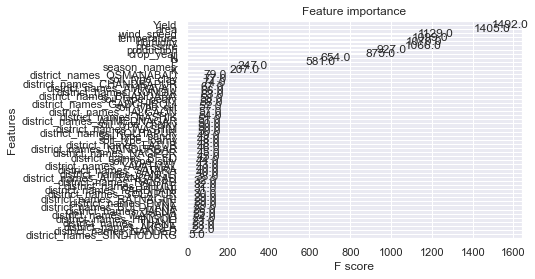

In [108]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))


precision = precision_score(Ytest, predicted_values,average='weighted') 
recall = recall_score(Ytest, predicted_values,average='weighted')  
auc = roc_auc_score(Ytest, XB.predict_proba(Xtest), multi_class='ovr')  
print('Precision: ',precision)
print('Recall: ',recall)
print('AUC: ',auc)

plot_importance(XB)
plt.show()

In [109]:
booster=XB.get_booster()
importance = booster.get_score(importance_type='weight')
feature_names=booster.feature_names
df_feature_imp = pd.DataFrame({'feature_names': list(importance.keys()), 'importance': list(importance.values())})
df_feature_imp=df_feature_imp.sort_values(by='importance',ascending=False)
df_feature_imp=df_feature_imp.reset_index(drop=True)
df_feature_imp

,feature_names,importance
0,Yield,1492.0
1,area,1405.0
2,wind_speed,1129.0
3,temperature,1099.0
4,humidity,1070.0
5,pressure,1066.0
6,production,927.0
7,crop_year,875.0
8,N,654.0
9,P,581.0


In [110]:
remove_columns=df_feature_imp[df_feature_imp['importance']<44].feature_names.tolist()
print(remove_columns)

['district_names_YAVATMAL', 'district_names_SANGLI', 'district_names_SATARA', 'district_names_AURANGABAD', 'district_names_DHULE', 'district_names_RAIGAD', 'district_names_PARBHANI', 'district_names_SOLAPUR', 'district_names_BULDHANA', 'district_names_PUNE', 'district_names_RATNAGIRI', 'district_names_JALNA', 'district_names_WARDHA', 'district_names_HINGOLI', 'district_names_THANE', 'district_names_AKOLA', 'district_names_NANDED', 'district_names_SINDHUDURG']


In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



# Initialize KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the model on the training set
knn.fit(Xtrain, Ytrain)

# Predict class labels for testing set
y_pred = knn.predict(Xtest)

# Evaluate accuracy of the model
accuracy = accuracy_score(Ytest, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(Ytest, y_pred,average='weighted') 
recall = recall_score(Ytest, y_pred,average='weighted')  
auc = roc_auc_score(Ytest, knn.predict_proba(Xtest), multi_class='ovr')  
print('Precision: ',precision)
print('Recall: ',recall)
print('AUC: ',auc)


Accuracy: 0.4738330975954738
Precision:  0.4904695965568542
Recall:  0.4738330975954738
AUC:  0.8469026833194977


In [112]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

precision = precision_score(Ytest, predicted_values,average='weighted') 
recall = recall_score(Ytest, predicted_values,average='weighted')  
auc = roc_auc_score(Ytest, NaiveBayes.predict_proba(Xtest), multi_class='ovr')  
print('Precision: ',precision)
print('Recall: ',recall)
print('AUC: ',auc)


Naive Bayes's Accuracy is:  0.3338048090523338
              precision    recall  f1-score   support

           0       0.28      0.05      0.09        96
           1       0.61      0.27      0.38        91
           2       0.29      0.20      0.24        96
           3       0.27      0.34      0.30        91
           4       0.27      0.22      0.24        78
           5       1.00      0.53      0.69        79
           6       0.21      0.64      0.32        86
           7       0.40      0.47      0.43        90

    accuracy                           0.33       707
   macro avg       0.42      0.34      0.34       707
weighted avg       0.41      0.33      0.33       707

Precision:  0.4087514339912514
Recall:  0.3338048090523338
AUC:  0.718194527653451


In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


In [114]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [115]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
#RS - Acc
#42 - 66%
#102 -64%

In [116]:
grid_search.fit(Xtrain, Ytrain)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [117]:
print('Best hyperparameters:', grid_search.best_params_)
predicted_values = grid_search.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('GridSearch CV')

print('Accuracy:', accuracy_score(Ytest, predicted_values))


print(classification_report(Ytest,predicted_values))

precision = precision_score(Ytest, predicted_values,average='weighted') 
recall = recall_score(Ytest, predicted_values,average='weighted')  
auc = roc_auc_score(Ytest, grid_search.predict_proba(Xtest), multi_class='ovr')  
print('Precision: ',precision)
print('Recall: ',recall)
print('AUC: ',auc)

Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.6605374823196606
              precision    recall  f1-score   support

           0       0.55      0.46      0.50        96
           1       0.78      0.47      0.59        91
           2       0.85      0.85      0.85        96
           3       0.45      0.48      0.47        91
           4       0.53      0.63      0.57        78
           5       1.00      1.00      1.00        79
           6       0.43      0.56      0.49        86
           7       0.82      0.87      0.84        90

    accuracy                           0.66       707
   macro avg       0.68      0.67      0.66       707
weighted avg       0.68      0.66      0.66       707

Precision:  0.675472623000027
Recall:  0.6605374823196606
AUC:  0.9394670094920694


In [253]:
## Saving Trained XGBoost Model

In [95]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

In [96]:
## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

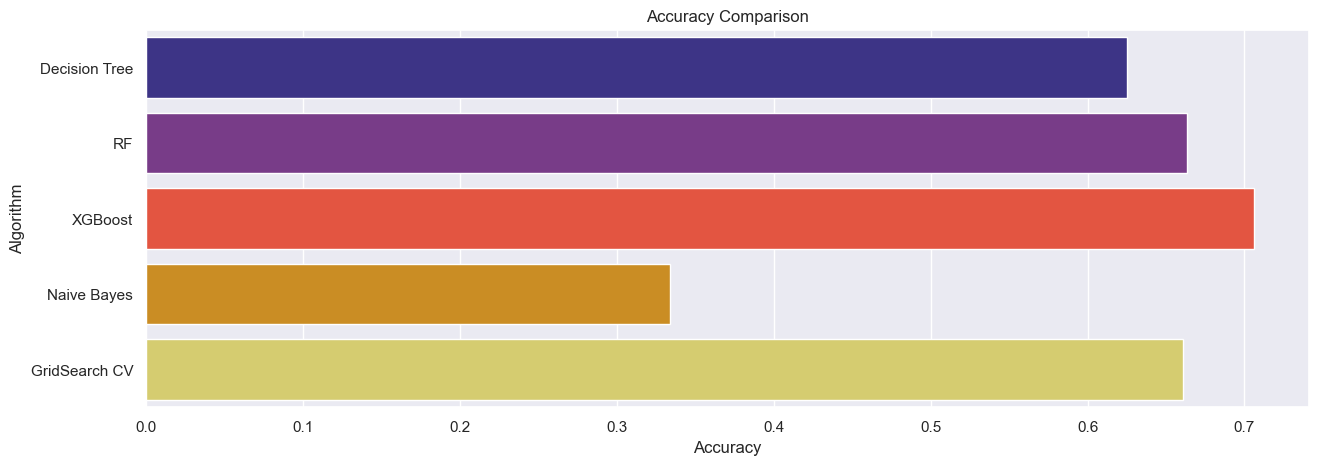

In [118]:
plt.figure(figsize=[15,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='CMRmap')

In [119]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.6251768033946252
RF --> 0.6633663366336634
XGBoost --> 0.7057991513437057
Naive Bayes --> 0.3338048090523338
GridSearch CV --> 0.6605374823196606


## Making a prediction

In [113]:
data = np.array([[2008,0,28000,21.08,2.10,1015.33,21.25,7.68,7.54,0.0,1200,0.444,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]])
prediction = XB.predict(data)
print(prediction)
#0,0,0,0,0,0,0,0,0,0
# get the original values
original_data = labelEncoder_y.inverse_transform(prediction)

print(original_data)

[0]
['Arhar/Tur']


In [ ]:
data = np.array([[2008,0,28000,21.08,2.10,1015.33,21.25,7.68,7.54,0.0,1200,0.444,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]])
prediction = XB.predict(data)
print(prediction)
#0,0,0,0,0,0,0,0,0,0
# get the original values
original_data = labelEncoder_y.inverse_transform(prediction)

print(original_data)

In [111]:
##Integer Label Encoding
#np.array([[2008,0,28000,21.08,2.10,1015.33,21.25,7.68,7.54,0.0,1200,0.444,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]]) --> 'Arhar/Tur': 0
#np.array([[2000,1,94700,20.24,1.98,1013.63,20.43,597.55,0.00,0.0,135800,1.43 ,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]) -->'Wheat' : 7
#np.array([[2005,0,56600,21.32,2.010,1015.140,21.84,27.195,0.0,0.0,439530.0,77.65,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]])  --> 'Sugarcane': 5,




## One Hot Encoding
#np.array([[2008,28000,21.08,2.10,1015.33,21.25,7.68,7.54,0.0,1200,0.444,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1]]) --> 'Arhar/Tur': 0
#np.array([[2000,94700,20.24,1.98,1013.63,20.43,597.55,0.00,0.0,135800,1.43 ,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])  -->'Wheat' : 7
#np.array([[2005,56600,21.32,2.010,1015.140,21.84,27.195,0.0,0.0,439530.0,77.65,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]]) --> 'Sugarcane': 5,

In [5]:
#prediction.shape

In [3]:
#pip install pycaret


In [ ]:
#conda install -c conda-forge pycaret


In [ ]:
'''
from pycaret.datasets import get_data
from pycaret.classification import *

# load the iris dataset
data = get_data('updated_8crop_datset.csv')

# setup the classification problem with PyCaret
setup(data=data, target='crop_names', session_id=42)

# compare models and select the best one
best_model = compare_models()

# train the best model
final_model = finalize_model(best_model)

# make predictions on new data
new_data = data.drop('crop_names', axis=1)
predictions = predict_model(final_model, new_data=new_data)
'''